In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reading Data from CSV files

In [3]:
dataset = pd.read_csv("LoanData.csv")
dataset.head(1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0


# Dropping duplicates from both train and test data

In [4]:
dataset = dataset.drop_duplicates(keep='first')


# Looking through the data

In [5]:
dataset.shape

(89786, 19)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89786 entries, 0 to 100000
Data columns (total 19 columns):
Loan ID                         89785 non-null object
Customer ID                     89785 non-null object
Loan Status                     89785 non-null object
Current Loan Amount             89785 non-null float64
Term                            89785 non-null object
Credit Score                    70631 non-null float64
Annual Income                   70631 non-null float64
Years in current job            85983 non-null object
Home Ownership                  89785 non-null object
Purpose                         89785 non-null object
Monthly Debt                    89785 non-null float64
Years of Credit History         89785 non-null float64
Months since last delinquent    41448 non-null float64
Number of Open Accounts         89785 non-null float64
Number of Credit Problems       89785 non-null float64
Current Credit Balance          89785 non-null float64
Maximum Open Cred

In [7]:
dataset.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,8.978500e+04,70631.000000,7.063100e+04,89785.000000,89785.000000,41448.000000,89785.000000,89785.000000,8.978500e+04,8.978300e+04,89595.000000,89776.000000
mean,1.306089e+07,1130.830598,1.375894e+06,18396.906410,18.248642,34.975873,11.123250,0.164983,2.940351e+05,7.756565e+05,0.115531,0.028605
std,3.329556e+07,1571.037395,1.104852e+06,12145.282372,7.034607,22.008585,4.998884,0.478010,3.722277e+05,8.803517e+06,0.347919,0.255108
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.802680e+05,708.000000,8.479320e+05,10157.400000,13.500000,16.000000,8.000000,0.000000,1.129360e+05,2.770680e+05,0.000000,0.000000
50%,3.138740e+05,729.000000,1.168975e+06,16140.310000,17.000000,32.000000,10.000000,0.000000,2.097220e+05,4.726920e+05,0.000000,0.000000
75%,5.323780e+05,742.000000,1.648915e+06,23918.910000,21.700000,51.000000,14.000000,0.000000,3.675170e+05,7.914500e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [8]:
dataset.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.113523,0.014544,-0.005019,0.017628,0.010817,0.001828,-0.000267,0.004524,-0.001957,0.001858,-0.001144
Credit Score,-0.113523,1.000000,-0.017255,0.000422,-0.012809,-0.005229,0.007264,-0.001034,0.000474,-0.003435,-0.005474,0.006413
Annual Income,0.014544,-0.017255,1.000000,0.472246,0.156126,-0.075784,0.142222,-0.016749,0.300975,0.046992,-0.047065,0.039407
Monthly Debt,-0.005019,0.000422,0.472246,1.000000,0.196123,-0.055824,0.409940,-0.054212,0.477464,0.036638,-0.079015,0.021354
Years of Credit History,0.017628,-0.012809,0.156126,0.196123,1.000000,-0.043777,0.130672,0.062091,0.209311,0.030779,0.066425,0.018654
Months since last delinquent,0.010817,-0.005229,-0.075784,-0.055824,-0.043777,1.000000,-0.033023,0.101517,-0.029150,-0.008720,0.121234,0.011041
Number of Open Accounts,0.001828,0.007264,0.142222,0.409940,0.130672,-0.033023,1.000000,-0.015035,0.228274,0.030043,-0.025306,0.006540
Number of Credit Problems,-0.000267,-0.001034,-0.016749,-0.054212,0.062091,0.101517,-0.015035,1.000000,-0.111790,-0.012065,0.753178,0.581343
Current Credit Balance,0.004524,0.000474,0.300975,0.477464,0.209311,-0.029150,0.228274,-0.111790,1.000000,0.131892,-0.122237,-0.014913
Maximum Open Credit,-0.001957,-0.003435,0.046992,0.036638,0.030779,-0.008720,0.030043,-0.012065,0.131892,1.000000,-0.014270,-0.001652


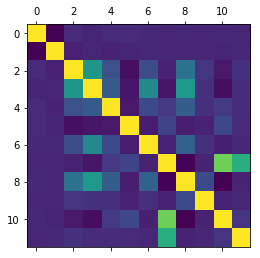

In [9]:
plt.matshow(dataset.corr())

# Removing unnecessary values from the data (IDs)

In [10]:
dataset.drop(['Loan ID','Customer ID'],axis=1,inplace = True)

# Checking for null values

sns.heatmap(data_train.isnull())

In [11]:
dataset.isnull().sum()

Loan Status                         1
Current Loan Amount                 1
Term                                1
Credit Score                    19155
Annual Income                   19155
Years in current job             3803
Home Ownership                      1
Purpose                             1
Monthly Debt                        1
Years of Credit History             1
Months since last delinquent    48338
Number of Open Accounts             1
Number of Credit Problems           1
Current Credit Balance              1
Maximum Open Credit                 3
Bankruptcies                      191
Tax Liens                          10
dtype: int64

In [12]:
#dataset.isnull().sum()

# Handling Null Values

Loan Status: 

As we need to train our model to predict Loan status we directly drop the null values of this column of training data

In [13]:
dataset.dropna(subset=['Loan Status'],axis=0,inplace = True)  

Current Loan Amount:

Based on the 'Current Loan Amount' we can decide whether the customer is able to re-pay the loan, so we are dropping the single record which has null value

In [14]:
dataset.dropna(subset=['Current Loan Amount'],axis=0,inplace = True)

Annual Income:

From the co-relation matrix we could find that Monthly debit has more co-relation with Annual Income.
We determine a factor which could get us the missing values of annual income i.e by taking the mean of 
the ratio of 'Annual Income' to 'Monthly debt'

factor = mean( Annual Income / Monthly debt)

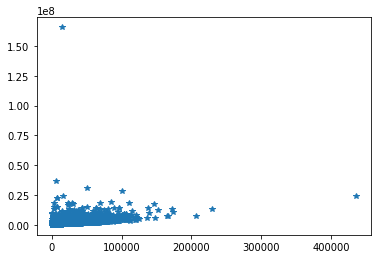

In [15]:
plt.plot(dataset['Monthly Debt'],dataset['Annual Income'],'*')

As there are outliers in the data we cannot observe the pattern so we plot the graph for sample of 100 data points to observe the relation between the monthly debt and annual income

In [16]:
sample_data = dataset.head(100)

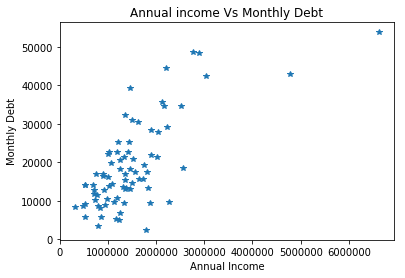

In [17]:
plt.plot(sample_data['Annual Income'],sample_data['Monthly Debt'],'*')
plt.title('Annual income Vs Monthly Debt')
plt.xlabel("Annual Income")
plt.ylabel("Monthly Debt")
plt.show()

From the above graph we could say that the monthly debt is directly proportional to Annual Income

In [18]:
dataset['debt_to_salary_ratio'] = dataset['Annual Income']/dataset['Monthly Debt']

In [19]:
dataset['debt_to_salary_ratio'].mean()

inf

There might be some customers with zero monthly debt which has resulted in the mean of ratio being infinite

In [20]:
dataset.columns.get_loc("debt_to_salary_ratio")

17

In [21]:
dataset.columns.get_loc("debt_to_salary_ratio")

17

In [22]:
is_inf = dataset.iloc[:, 17] == np.inf
factor = dataset.ix[~is_inf, 17].mean()

C:\Users\Tony Stark\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [23]:
print("factor: {}".format(factor))

factor: 120.89456830602086


In [24]:
dataset['Annual Income'].fillna(dataset['Monthly Debt']*factor, inplace=True)

In [25]:
# dataset.isnull().sum()

Credit Score:

This determines the goodwill of the customer based on past credit history. Usually the Credit score lies between 300 to 850. Based on 76295 records we refill the outlier records and null values of the column.

Excellent/very good credit score: 700 to 850
Good credit score: 680 to 699
Average/OK credit score: 620 to 679
Low credit score: 580 to 619
Poor credit score: 500 to 579
Bad credit score: 300 to 499

In [26]:
score = [300, 499, 579, 619, 679, 699, 850,10000]
# gags = [1,2,3,4,5,6]
tags = ['Bad','Poor','Low','Average','Good','Excellent','Outliers']
dataset['binned'] = pd.cut(dataset['Credit Score'], bins=score, labels=tags)
dataset.head(5)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,debt_to_salary_ratio,binned
0,Fully Paid,445412.0,Short Term,709.0,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,223.883262,Excellent
1,Fully Paid,262328.0,Short Term,NaN,4.025303e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,NaN,NaN
2,Fully Paid,99999999.0,Short Term,741.0,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,76.433270,Excellent
3,Fully Paid,347666.0,Long Term,721.0,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,92.308194,Excellent
4,Fully Paid,176220.0,Short Term,NaN,2.495228e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,NaN,NaN


In [27]:
#dataset.replace(np.inf, 0,inplace =True)

In [28]:
dataset.groupby('binned')['Credit Score','Current Loan Amount','debt_to_salary_ratio','Maximum Open Credit','Current Credit Balance','Years of Credit History'].mean()

,Credit Score,Current Loan Amount,debt_to_salary_ratio,Maximum Open Credit,Current Credit Balance,Years of Credit History
binned,,,,,,
Bad,NaN,NaN,NaN,NaN,NaN,NaN
Poor,NaN,NaN,NaN,NaN,NaN,NaN
Low,606.243292,1.044235e+07,inf,635501.130590,349245.627907,17.483721
Average,659.584837,1.184163e+07,inf,592829.469466,315648.684421,17.504441
Good,690.715373,1.211760e+07,inf,614371.200621,301319.061646,17.606351
Excellent,730.156273,1.900333e+07,inf,794197.610068,290529.393777,18.443586
Outliers,7108.989233,3.290381e+05,inf,643030.007473,295616.712371,17.845968


In [29]:

dataset.groupby('binned')['Credit Score','Current Loan Amount','debt_to_salary_ratio','Maximum Open Credit','Current Credit Balance','Years of Credit History'].median()

,Credit Score,Current Loan Amount,debt_to_salary_ratio,Maximum Open Credit,Current Credit Balance,Years of Credit History
binned,,,,,,
Bad,NaN,NaN,NaN,NaN,NaN,NaN
Poor,NaN,NaN,NaN,NaN,NaN,NaN
Low,608.0,497684.0,64.760277,447986.0,235163.0,16.4
Average,663.0,427581.0,65.217777,438647.0,228114.0,16.4
Good,692.0,366476.0,66.298020,430661.0,216543.0,16.5
Excellent,733.0,313588.0,73.171091,484330.0,206739.0,17.1
Outliers,7190.0,292248.0,65.217391,447997.0,217835.0,16.5


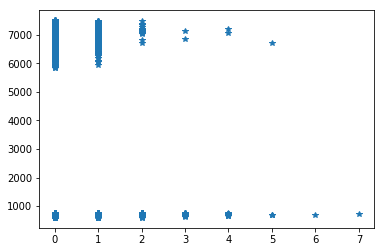

In [30]:
plt.plot(dataset['Bankruptcies'],dataset['Credit Score'],'*')

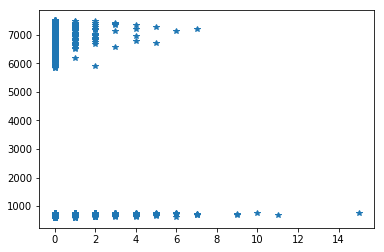

In [31]:
plt.plot(dataset['Tax Liens'],dataset['Credit Score'],'*')

In [32]:
dataset.drop(dataset[dataset['Credit Score'] > 850].index,inplace=True)

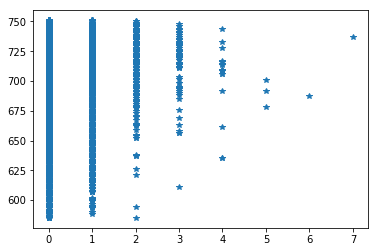

In [33]:
plt.plot(dataset['Bankruptcies'],dataset['Credit Score'],'*')

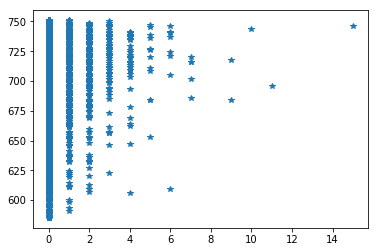

In [34]:
plt.plot(dataset['Tax Liens'],dataset['Credit Score'],'*')

In [35]:
dataset.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,debt_to_salary_ratio
Current Loan Amount,1.000000,0.108425,-0.054609,-0.004995,0.016910,0.010663,0.002554,-0.000205,0.004829,-0.002285,0.001597,-0.000566,0.000208
Credit Score,0.108425,1.000000,0.004603,-0.087981,0.083330,0.043853,-0.028212,-0.052349,-0.013605,0.017533,-0.038268,-0.022643,0.010648
Annual Income,-0.054609,0.004603,1.000000,0.652813,0.178034,-0.060883,0.226533,-0.033684,0.379211,0.038375,-0.062236,0.033048,0.045095
Monthly Debt,-0.004995,-0.087981,0.652813,1.000000,0.197046,-0.055093,0.409197,-0.056058,0.485314,0.034278,-0.080252,0.021150,-0.078913
Years of Credit History,0.016910,0.083330,0.178034,0.197046,1.000000,-0.044231,0.131520,0.061758,0.216465,0.030251,0.066541,0.017769,-0.006894
Months since last delinquent,0.010663,0.043853,-0.060883,-0.055093,-0.044231,1.000000,-0.032888,0.103833,-0.030124,-0.008794,0.123183,0.012493,-0.010033
Number of Open Accounts,0.002554,-0.028212,0.226533,0.409197,0.131520,-0.032888,1.000000,-0.016673,0.234503,0.029282,-0.026818,0.006147,-0.054369
Number of Credit Problems,-0.000205,-0.052349,-0.033684,-0.056058,0.061758,0.103833,-0.016673,1.000000,-0.117765,-0.012111,0.754720,0.576777,0.002409
Current Credit Balance,0.004829,-0.013605,0.379211,0.485314,0.216465,-0.030124,0.234503,-0.117765,1.000000,0.125720,-0.127876,-0.016372,-0.033193
Maximum Open Credit,-0.002285,0.017533,0.038375,0.034278,0.030251,-0.008794,0.029282,-0.012111,0.125720,1.000000,-0.014213,-0.001814,-0.001335


In [36]:
dataset.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                       0
Years in current job             3556
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    45866
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 1
Bankruptcies                      180
Tax Liens                           9
debt_to_salary_ratio            19154
binned                          19154
dtype: int64

In [37]:
# dataset['newcredit'] = dataset['Credit Score']

In [38]:
dataset.to_csv('Stage1.csv')

In [39]:
#######################################################################################

In [40]:
dataset = pd.read_csv("Stage1.csv")

In [41]:
dataset.head(1)

,Unnamed: 0,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,debt_to_salary_ratio,binned
0,0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,223.883262,Excellent


Excellent/very good credit score: 700 to 850
Good credit score: 680 to 699
Average/OK credit score: 620 to 679
Low credit score: 580 to 619
Poor credit score: 500 to 579
Bad credit score: 300 to 499

In [42]:
score = [300, 499, 579, 619, 679, 699, 850]
gags = [1,2,3,4,5,6]
tags = ['Bad','Poor','Low','Average','Good','Excellent']
dataset['binned'] = pd.cut(dataset['Credit Score'], bins=score, labels=tags)
# print (data_train)

In [43]:
#######################################################################################################

In [44]:
# dataset.head(1)

In [45]:
#dataset.replace(np.inf, 0,inplace =True)

In [46]:
dataset['Income_Open_credit_ratio']= dataset['Maximum Open Credit']/dataset['Annual Income']

In [47]:
dataset['Income_Open_credit_ratio'].mean()

inf

In [48]:
dataset.columns.get_loc("Income_Open_credit_ratio")


20

In [49]:
is_inf = dataset.loc[:, 'Income_Open_credit_ratio'] == np.inf
mean_ratio = dataset.ix[~is_inf, 'Income_Open_credit_ratio'].mean()

C:\Users\Tony Stark\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [50]:
mean_ratio

0.5846450731060379

In [51]:
#max open is bsed on annual income n credit score
#plt.plot(dataset['Annual Income'],dataset['Maximum Open Credit'],'*')

In [52]:
#dataset.sort_values(by=['Annual Income','Maximum Open Credit'],axis=0,ascending=True,inplace=True)

In [53]:
#sam = dataset.head(100)

In [54]:
#plt.plot(sam['Annual Income'],sam['Maximum Open Credit'],'*')

In [55]:
dataset.groupby('binned')['Credit Score','Current Loan Amount','debt_to_salary_ratio','Maximum Open Credit','Current Credit Balance','Years of Credit History','Income_Open_credit_ratio'].mean()

,Credit Score,Current Loan Amount,debt_to_salary_ratio,Maximum Open Credit,Current Credit Balance,Years of Credit History,Income_Open_credit_ratio
binned,,,,,,,
Bad,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low,606.243292,1.044235e+07,inf,635501.130590,349245.627907,17.483721,0.413654
Average,659.584837,1.184163e+07,inf,592829.469466,315648.684421,17.504441,0.453944
Good,690.715373,1.211760e+07,inf,614371.200621,301319.061646,17.606351,0.471322
Excellent,730.156273,1.900333e+07,inf,794197.610068,290529.393777,18.443586,0.593301


In [56]:
dataset.groupby('binned')['Credit Score','Current Loan Amount','debt_to_salary_ratio','Maximum Open Credit','Current Credit Balance','Income_Open_credit_ratio'].median()

,Credit Score,Current Loan Amount,debt_to_salary_ratio,Maximum Open Credit,Current Credit Balance,Income_Open_credit_ratio
binned,,,,,,
Bad,NaN,NaN,NaN,NaN,NaN,NaN
Poor,NaN,NaN,NaN,NaN,NaN,NaN
Low,608.0,497684.0,64.760277,447986.0,235163.0,0.313736
Average,663.0,427581.0,65.217777,438647.0,228114.0,0.363282
Good,692.0,366476.0,66.298020,430661.0,216543.0,0.373692
Excellent,733.0,313588.0,73.171091,484330.0,206739.0,0.420159


In [57]:
# dataset.groupby('binned')['Credit Score','Current Loan Amount','debt_to_salary_ratio','Maximum Open Credit','Current Credit Balance','Years of Credit History'].mode()

In [58]:
def credit_fillingNullvalues(data):
    i_open = data[0]
    creditScore = data[1]
    if pd.isnull(creditScore):
        if (i_open < 0.43):
            return 606
        if (i_open < 0.46):
            return 659
        if (i_open < 0.53):
            return 690
        else:
            return 730

In [59]:
# dataset['Credit Score'] = dataset[['Credit Score','Income_Open_credit_ratio']].apply(credit_fillingNullvalues,axis=1)
dataset['Credit Score']=dataset['Credit Score'].fillna(dataset[['Income_Open_credit_ratio','Credit Score']].apply(credit_fillingNullvalues,axis=1))


In [60]:
dataset.isnull().sum()

Unnamed: 0                          0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Annual Income                       0
Years in current job             3556
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    45866
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 1
Bankruptcies                      180
Tax Liens                           9
debt_to_salary_ratio            19154
binned                          19154
Income_Open_credit_ratio           18
dtype: int64

In [61]:
dataset.head(1)

,Unnamed: 0,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,...,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,debt_to_salary_ratio,binned,Income_Open_credit_ratio
0,0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,...,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,223.883262,Excellent,0.356958


Months since last delinquent:
As most of the customers haven't commited any crime irrespective of credit score or annual income etc, so for the missing values we have assumed to be zero. We try to build the model with and without this parameter, if there isn't any improvement we discard this feature

Years in current job:
This feature also doesn't have any kind of weightage to know the loan status, so we dropped this feature

In [62]:
dataset['Months since last delinquent'].fillna(0,inplace=True)
# dataset['Years in current job'].fillna(dataset['Years in current job'].mean(),inplace=True)
dataset.drop(["Years in current job"],axis =1,inplace =True)

In [63]:
dataset.isnull().sum()

Unnamed: 0                          0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Annual Income                       0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 1
Bankruptcies                      180
Tax Liens                           9
debt_to_salary_ratio            19154
binned                          19154
Income_Open_credit_ratio           18
dtype: int64

In [64]:
 #plt.plot(dataset['Credit Score'],dataset['Bankruptcies'],'*')

Bankruptcies and Tax Liens:
For majority of the customers the bankruptcies and tax liens are zero so we assumed the missing values to be zero  

In [65]:
dataset['Bankruptcies'].fillna(0,inplace=True)
dataset['Tax Liens'].fillna(0,inplace=True)

Maximum Open Credit:
Previously we had computed "Income_Open_credit_ratio" through which we can get the Maximum Open Credit from Annual Income.

In [66]:
dataset['Maximum Open Credit'].fillna(dataset['Income_Open_credit_ratio']*dataset['Annual Income'],inplace=True)

In [67]:
dataset.dropna(axis=0,inplace=True)

In [68]:
dataset.isnull().sum()

Unnamed: 0                      0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
debt_to_salary_ratio            0
binned                          0
Income_Open_credit_ratio        0
dtype: int64

In [69]:
dataset.drop(['debt_to_salary_ratio','binned','Income_Open_credit_ratio','Unnamed: 0'],axis=1,inplace = True)

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66080 entries, 0 to 85233
Data columns (total 16 columns):
Loan Status                     66080 non-null object
Current Loan Amount             66080 non-null float64
Term                            66080 non-null object
Credit Score                    66080 non-null float64
Annual Income                   66080 non-null float64
Home Ownership                  66080 non-null object
Purpose                         66080 non-null object
Monthly Debt                    66080 non-null float64
Years of Credit History         66080 non-null float64
Months since last delinquent    66080 non-null float64
Number of Open Accounts         66080 non-null float64
Number of Credit Problems       66080 non-null float64
Current Credit Balance          66080 non-null float64
Maximum Open Credit             66080 non-null float64
Bankruptcies                    66080 non-null float64
Tax Liens                       66080 non-null float64
dtypes: float64

# Converting the categorical data to numeric data

In [71]:
categorical_data = dataset.select_dtypes(include=['object'])
categorical_data.head()

,Loan Status,Term,Home Ownership,Purpose
0,Fully Paid,Short Term,Home Mortgage,Home Improvements
2,Fully Paid,Short Term,Own Home,Debt Consolidation
3,Fully Paid,Long Term,Own Home,Debt Consolidation
5,Fully Paid,Short Term,Home Mortgage,Debt Consolidation
7,Fully Paid,Short Term,Rent,Debt Consolidation


In [72]:
dataset.groupby('Loan Status').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan Status,,,,,,,,,,,,
Charged Off,3.241032e+05,710.207678,1.254555e+06,18727.686879,17.907923,15.797851,11.237144,0.170551,285282.317877,630784.825500,0.112568,0.033573
Fully Paid,2.173728e+07,721.217630,1.410721e+06,18334.178680,18.358215,16.357537,11.102001,0.165010,296398.212426,787854.843526,0.117257,0.027648


In [73]:
# # dataset["Loan_status"] = dataset["Loan Status"].cat.codes
# from sklearn.preprocessing import LabelEncoder

# lb_make = LabelEncoder()
# obj_df["make_code"] = lb_make.fit_transform(obj_df["make"])

In [74]:
dataset.groupby('Term').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Term,,,,,,,,,,,,
Long Term,1.372104e+07,697.005874,1.524161e+06,21577.65962,18.693452,16.005644,11.798664,0.145819,357625.194483,890174.996199,0.100207,0.027298
Short Term,1.903026e+07,726.986534,1.329708e+06,17280.34867,18.121716,16.337528,10.888804,0.173290,271686.384165,710569.424173,0.122116,0.029313


In [75]:
dataset.groupby('Home Ownership').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Home Ownership,,,,,,,,,,,,
HaveMortgage,1.982990e+07,718.857143,1.402449e+06,18119.963946,18.711565,15.836735,10.176871,0.204082,252038.619048,3.151969e+06,0.142857,0.040816
Home Mortgage,1.803786e+07,720.592328,1.573903e+06,21014.097872,19.576277,16.774129,11.820682,0.165198,356022.222891,9.634925e+05,0.113897,0.029638
Own Home,1.729980e+07,717.908956,1.248044e+06,16939.342042,18.941366,16.028699,10.977899,0.180934,294742.017318,7.716115e+05,0.122876,0.033482
Rent,1.722767e+07,717.643446,1.184758e+06,15698.091013,16.602709,15.690647,10.358435,0.163628,222419.674986,5.022360e+05,0.117658,0.026693


In [76]:
dataset["Home Ownership"].replace("HaveMortgage","Home Mortgage",inplace=True)

In [77]:
dataset.groupby('Purpose').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Purpose,,,,,,,,,,,,
Business Loan,1.234118e+07,703.461224,1.581012e+06,16099.528051,18.197857,16.541837,9.643878,0.152041,272572.778571,1.077472e+06,0.088776,0.037755
Buy House,1.700852e+07,706.901376,1.490341e+06,14702.934289,17.127064,16.222477,9.974771,0.181193,207161.575688,7.231396e+05,0.128440,0.036697
Buy a Car,2.034838e+07,726.621005,1.210631e+06,13134.285947,17.700913,14.549087,9.509132,0.143836,208287.087900,9.587017e+05,0.099315,0.019406
Debt Consolidation,1.768663e+07,720.221283,1.364015e+06,19039.761116,18.308412,16.189129,11.423197,0.163464,309791.959663,7.299802e+05,0.116466,0.027494
Educational Expenses,1.983862e+07,725.070423,1.073406e+06,11449.929859,20.301408,13.915493,10.126761,0.028169,208156.507042,6.060668e+05,0.000000,0.000000
Home Improvements,1.859261e+07,720.360862,1.676564e+06,17844.706486,19.093434,18.077456,10.744550,0.217492,272959.735573,1.033956e+06,0.155168,0.030777
Medical Bills,1.835750e+07,711.515278,1.423045e+06,17966.584986,19.256667,15.120833,10.534722,0.208333,244046.054167,6.075219e+05,0.130556,0.048611
Other,1.868679e+07,719.398708,1.357728e+06,14525.616525,17.223950,14.576373,9.636825,0.125981,204170.405168,8.018361e+05,0.074758,0.031380
Take a Trip,1.727888e+07,715.166213,1.245833e+06,15513.702943,17.410899,16.294278,9.692098,0.198910,192223.000000,1.485534e+06,0.149864,0.027248


In [78]:
dataset["Purpose"].replace("other","Other",inplace=True)

In [79]:
char_cols=categorical_data.columns

In [80]:
label_mapping = {}

for c in char_cols:
    dataset[c], label_mapping[c] = pd.factorize(dataset[c])

In [81]:
dataset.head(20)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0,445412.0,0,709.0,1167493.0,0,0,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
2,0,99999999.0,0,741.0,2231892.0,1,1,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,0,347666.0,1,721.0,806949.0,1,1,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,0,217646.0,0,730.0,1184194.0,0,1,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,0,548746.0,0,678.0,2559110.0,2,1,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
8,0,215952.0,0,739.0,1454735.0,2,1,39277.75,13.9,0.0,20.0,0.0,669560.0,1021460.0,0.0,0.0
9,0,99999999.0,0,728.0,714628.0,2,1,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
11,0,99999999.0,0,740.0,776188.0,1,1,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
12,0,99999999.0,0,743.0,1560907.0,2,1,17560.37,13.3,0.0,10.0,1.0,225549.0,496474.0,1.0,0.0
13,0,234124.0,0,727.0,693234.0,2,1,14211.24,24.7,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0


In [82]:
label_mapping

{'Loan Status': Index(['Fully Paid', 'Charged Off'], dtype='object'),
 'Term': Index(['Short Term', 'Long Term'], dtype='object'),
 'Home Ownership': Index(['Home Mortgage', 'Own Home', 'Rent'], dtype='object'),
 'Purpose': Index(['Home Improvements', 'Debt Consolidation', 'Buy House', 'Business Loan',
        'Other', 'Take a Trip', 'Buy a Car', 'small_business', 'Medical Bills',
        'wedding', 'vacation', 'major_purchase', 'Educational Expenses',
        'moving', 'renewable_energy'],
       dtype='object')}

In [83]:
dataset.to_csv('processed_data.csv')

In [84]:
dataset.shape

(66080, 16)